In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import cufflinks as cf
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zenglan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(20)

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
5,12 stones,anthem for the underdog (picture perfect sessi...,Rock,en,You say you know just who I am\nBut you can't ...
6,12 stones,picture perfect,Rock,en,Looking for light in the darkness\nIs somethin...
7,12 stones,bitter,Rock,en,"Mother mother can you hear me,I keep trying\nJ..."
8,12 stones,it was you,Rock,en,"It was you,\nThat showed me who I am,\nAnd tau..."
9,12 stones,back up,Rock,en,\nI hear the words you say to me\nI see the wa...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290183 entries, 0 to 290182
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Artist    290183 non-null  object
 1   Song      290182 non-null  object
 2   Genre     290183 non-null  object
 3   Language  290179 non-null  object
 4   Lyrics    290148 non-null  object
dtypes: object(5)
memory usage: 11.1+ MB


General Overview of the data

In [5]:
print('Number of instances in the dataset: ',len(data))
print('Missing Value in the Genre: ', data['Genre'].isnull().sum())
print('The distribution of the Genre:\n',data['Genre'].value_counts())

Number of instances in the dataset:  290183
Missing Value in the Genre:  0
The distribution of the Genre:
 Rock          121404
Pop           108714
Metal          20291
Jazz           13545
Folk            8644
Indie           8449
R&B             2793
Hip-Hop         2240
Electronic      2213
Country         1890
Name: Genre, dtype: int64


Visualise the Genre Distribution

In [6]:
# Visualization of Genre Distribution

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

data['Genre'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Songs', 
                                                                title='Song Genre Distribution')

In [7]:
data['Language'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Songs', 
                                                                title='Lyrics Language')

# Preprocessing

### Select Only English Language Lyrics

In [8]:
en_data = data[data['Language']=='en']
en_data

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [9]:
en_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250197 entries, 0 to 290182
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Artist    250197 non-null  object
 1   Song      250196 non-null  object
 2   Genre     250197 non-null  object
 3   Language  250197 non-null  object
 4   Lyrics    250197 non-null  object
dtypes: object(5)
memory usage: 11.5+ MB


Visualise the Genre Distribution

In [10]:
en_data['Genre'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of English Songs', 
                                                                title='English Song Genre Distribution')

Remove `punctuations`, `numbers`, `\n`, `English Stopwords`

In [11]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|\n@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]') # removing any symbol that is NOT number, letter, space, '#', '+', or '_'.
STOPWORDS = set(stopwords.words('english')) # only dealing with English Lyrics, so set stopwords to 'english'

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text

en_data['Lyrics'] = en_data['Lyrics'].apply(clean_text)
en_data['Lyrics'] = en_data['Lyrics'].str.replace('\d+', '') # replacing one or more digits by nothing

In [12]:
en_data.head(20)

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,starts pain followed hate fueled endless quest...
1,12 stones,broken,Rock,en,freedom alone alone patiently waiting phone ho...
2,12 stones,3 leaf loser,Rock,en,biting hand feeds lying voice inside reach beg...
3,12 stones,anthem for the underdog,Rock,en,say know cant imagine waits across line though...
4,12 stones,adrenaline,Rock,en,heart beating faster cant control feelings any...
5,12 stones,anthem for the underdog (picture perfect sessi...,Rock,en,say know cant imagine waits across line though...
6,12 stones,picture perfect,Rock,en,looking light darkness something fools searchi...
7,12 stones,bitter,Rock,en,mother mother hear keep trying find know show ...
8,12 stones,it was you,Rock,en,showed taught stand know real sick pain tired ...
9,12 stones,back up,Rock,en,hear words say see way look know whats mind st...


In [13]:
print('Maximum length of preprocessed Lyrics: {}'.format(en_data['Lyrics'].map(len).max()))
print('Minimum length of preprocessed Lyrics: {}'.format(en_data['Lyrics'].map(len).min()))

Maximum length of preprocessed Lyrics: 10606
Minimum length of preprocessed Lyrics: 0


Remove the rows where the `Lyrics are empty strings` after preprocessing

In [14]:
en_data['length'] = en_data['Lyrics'].str.len()
en_data['Lyrics'].replace('',np.nan,inplace=True)
en_data.dropna(subset=['Lyrics'],inplace=True)
en_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250195 entries, 0 to 290182
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Artist    250195 non-null  object
 1   Song      250194 non-null  object
 2   Genre     250195 non-null  object
 3   Language  250195 non-null  object
 4   Lyrics    250195 non-null  object
 5   length    250195 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 13.4+ MB


In [15]:
en_data

,Artist,Song,Genre,Language,Lyrics,length
0,12 stones,world so cold,Rock,en,starts pain followed hate fueled endless quest...,965
1,12 stones,broken,Rock,en,freedom alone alone patiently waiting phone ho...,784
2,12 stones,3 leaf loser,Rock,en,biting hand feeds lying voice inside reach beg...,457
3,12 stones,anthem for the underdog,Rock,en,say know cant imagine waits across line though...,398
4,12 stones,adrenaline,Rock,en,heart beating faster cant control feelings any...,1031
...,...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,im best friend hes got id give shirt back know...,844
290179,bad boys blue,i totally miss you,Pop,en,bad boys blue totally miss wrong foolish heart...,815
290180,celine dion,sorry for love,Pop,en,forgive things never said forgive knowing righ...,777
290181,dan bern,cure for aids,Indie,en,day found cure aids day found cure aids everyb...,655


### Get the X and y Arrays

In [16]:
lyrics = en_data['Lyrics'].values
genre = en_data['Genre'].values

In [18]:
from sklearn.model_selection import train_test_split

lyrics_train, lyrics_val, genre_train, genre_val = train_test_split(lyrics, genre, test_size=0.2, random_state=100)

In [19]:
lyrics_train.shape, lyrics_val.shape, genre_train.shape, genre_val.shape

((200156,), (50039,), (200156,), (50039,))

### Encoding the Genre Column using LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(genre_train)
y_train = encoder.transform(genre_train)
y_val = encoder.transform(genre_val)

In [21]:
y_train.shape, y_train

((200156,), array([5, 7, 7, ..., 7, 9, 2]))

In [22]:
y_val.shape, y_val

((50039,), array([9, 9, 9, ..., 7, 7, 6]))

In [23]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[    0  1521]
 [    1  1615]
 [    2  6525]
 [    3  1819]
 [    4  5781]
 [    5 10702]
 [    6 15256]
 [    7 68956]
 [    8  2207]
 [    9 85774]]


In [24]:
from keras.utils import np_utils

dummy_y_train = np_utils.to_categorical(y_train)
dummy_y_val = np_utils.to_categorical(y_val)

dummy_y_train.shape, dummy_y_val.shape

((200156, 10), (50039, 10))

In [25]:
dummy_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

### Vectorization for the Lyrics: convert the text into integers

In [26]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer = Tokenizer(num_words=5000)   # num_words is the size of the vocabulary (top 5000 frequent words in the vocabulary)
tokenizer.fit_on_texts(lyrics_train)    # Updates internal vocabulary based on a list of texts

X_train = tokenizer.texts_to_sequences(lyrics_train)  # Transforms each text in texts to a sequence of integers with its corresponding integer value from the word_index dictionary
X_val = tokenizer.texts_to_sequences(lyrics_val)

# The number of unique words in the whole training text
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index for padding


In [27]:
print(lyrics_train[0])
print(X_train[0])
print(len(X_train[0]))
print('The vocabulary size is: ', vocab_size)

goes heart goes one love goes girl unworthy goes happiness couldnt goes somebody else place goodbye romance couldnt last somehow chance never thought could pass goes heart never thought could pass goes heart
[241, 40, 241, 11, 3, 241, 39, 241, 1075, 322, 241, 271, 267, 123, 282, 1077, 322, 117, 704, 313, 15, 147, 41, 513, 241, 40, 15, 147, 41, 513, 241, 40]
32
The vocabulary size is:  191136


Padding the sequence to get equal length of the calculated integers

In [28]:
def FindMaxLength(lst):
    maxList = max((x) for x in lst)
    maxLength = max(len(x) for x in lst )
  
    return maxList, maxLength

print(FindMaxLength(X_train))

([4999, 4999, 559, 801, 70, 1586, 15, 465, 25, 1005, 127, 7, 11, 23, 1706, 583, 667, 667, 3, 1596, 1433, 243, 3144, 13, 1005, 6, 7, 11, 23, 1706, 583, 1, 29, 26, 972, 1335, 230, 29, 99, 2511, 1558, 354, 15, 804, 582, 37, 4999, 4999, 559, 801, 70, 1586, 15, 465, 25, 1005, 6, 7, 11, 23, 1706, 583, 738, 6, 7, 11, 23, 1706, 583, 1, 29, 26, 972, 1335, 230, 29, 99, 2511, 1558, 354, 15, 804, 582, 37, 4999, 4999, 559, 801, 70, 1586, 15, 465, 25, 1005, 6, 7, 11, 23, 1706, 583, 738, 6, 7, 11, 23, 1706, 583, 738, 6, 7, 11, 23, 1706, 583, 738, 6, 7, 11, 23, 1706, 583, 738, 6, 7, 11, 23, 1706, 583], 1549)


In [29]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 1549

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

X_train.shape, X_val.shape

((200156, 1549), (50039, 1549))

## Basic Model with `on-the-fly` embeddings layer

Build the model

In [82]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding

embedding_dim = 50
vocab_size = 5000

model = Sequential()
model.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=maxlen))          # input_length is the length of the sequence
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1549, 50)          9556800   
_________________________________________________________________
flatten (Flatten)            (None, 77450)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               15490200  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 25,049,010
Trainable params: 25,049,010
Non-trainable params: 0
_________________________________________________________________


Train the model

In [98]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist = model.fit(X_train, dummy_y_train,
          batch_size=32,
          epochs=2,
          validation_data=(X_val, dummy_y_val))

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning:

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.



Epoch 1/2
6255/6255 [==============================] - 1558s 249ms/step - loss: 1.1672 - accuracy: 0.6027 - val_loss: 1.1716 - val_accuracy: 0.6010
Epoch 2/2
6255/6255 [==============================] - 1564s 250ms/step - loss: 0.9578 - accuracy: 0.6705 - val_loss: 1.1359 - val_accuracy: 0.6262


Evaluate the model

In [99]:
loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, dummy_y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7641
Testing Accuracy:  0.6262


NameError: name 'plot_history' is not defined

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

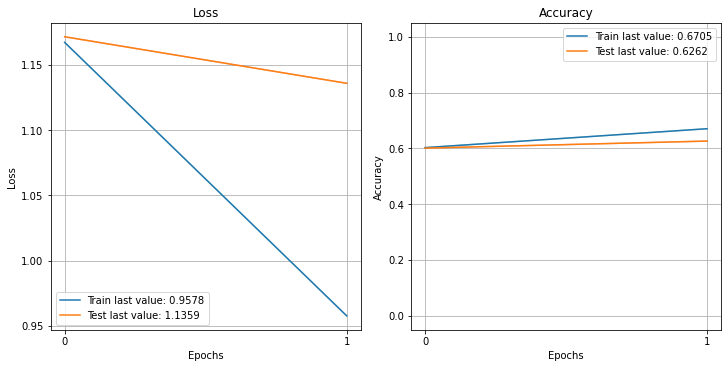

In [100]:
from plot_keras_history import plot_history

plot_history(hist)

## Simple RNN Model using on-the-fly word embeddings

In [30]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, SimpleRNN

embedding_dim = 50
vocab_size = 5000

model01 = Sequential()
model01.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=maxlen))          # input_length is the length of the sequence
model01.add(SimpleRNN(embedding_dim))
model01.add(Dense(200, activation='relu'))
model01.add(Dense(10, activation='softmax'))
model01.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1549, 50)          250000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 50)                5050      
_________________________________________________________________
dense (Dense)                (None, 200)               10200     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 267,260
Trainable params: 267,260
Non-trainable params: 0
_________________________________________________________________


In [31]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist01 = model01.fit(X_train, dummy_y_train,
          batch_size=64,
          epochs=5,
          validation_data=(X_val, dummy_y_val))

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning:

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.



Epoch 1/5
  83/3128 [..............................] - ETA: 53:35 - loss: 1.7691 - accuracy: 0.3289

KeyboardInterrupt: 

In [ ]:
from plot_keras_history import plot_history

loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, dummy_y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist01)

## LSTM Model Using on-the-fly Embedding

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, SimpleRNN

embedding_dim = 50
vocab_size = 5000

model02 = Sequential()
model02.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=maxlen))          # input_length is the length of the sequence
model02.add(LSTM(embedding_dim))
model02.add(Dense(200, activation='relu'))
model02.add(Dense(10, activation='softmax'))
model02.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model02.summary()

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist02 = model02.fit(X_train, dummy_y_train,
          batch_size=32,
          epochs=5,
          validation_data=(X_val, dummy_y_val))

In [ ]:
from plot_keras_history import plot_history

loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, dummy_y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist02)

## CNN Model Using on-the-fly Embedding

### Using CNN as an alternative to LSTM

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, SimpleRNN

embedding_dim = 50
vocab_size = 5000
num_filters = 128
kernal_size = 3


model03 = Sequential()
model03.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=maxlen))          # input_length is the length of the sequence
model03.add(Conv1D(num_filters,               # add a Convolution1D, which will learn filters
                 kernel_size,       # convolutional windows length, which mean will operate over 3 words every time
                 padding='valid',
                 activation='relu',
                 strides=1))
model03.add(GlobalMaxPooling1D())    # use max pooling to reduce the size of the feature maps
model03.add(Dense(200, activation='relu'))
model03.add(Dense(10, activation='softmax'))
model03.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model03.summary()

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist03 = model03.fit(X_train, dummy_y_train,
          batch_size=32,
          epochs=5,
          validation_data=(X_val, dummy_y_val))

In [ ]:
from plot_keras_history import plot_history

loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, dummy_y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist03)

Use GridSearch

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                            epochs=5, batch_size=32,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, dummy_y_train)

# Evaluate testing set
test_accuracy = grid.score(X_val, dummy_y_val)

In [ ]:
s = ('Best Accuracy : {:.4f}\n{}\nTest Accuracy : {:.4f}\n')
output_string = s.format(
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
print(output_string)

### Using CNN as an additional layer before a LSTM

The CNN-LSTM model will read subsequences of the main sequence in as blocks, extract features from each block, then allow the LSTM to interpret the features extracted from each block.

## Basic RNN Using pre-trained Embedding

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

embedding_dim = 50
vocab_size = 5000

hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1", output_shape=[50],
                           input_shape=[5000], dtype=tf.string)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, SimpleRNN

model04 = Sequential()
model04.add(hub_layer)         # this is a sentence enbedding layer
model04.add(SimpleRNN(embedding_dim))
model04.add(Dense(200, activation='relu'))
model04.add(Dense(10, activation='softmax'))
model04.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model04.summary()

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist04 = model04.fit(X_train, dummy_y_train,
          batch_size=32,
          epochs=5,
          validation_data=(X_val, dummy_y_val))

In [ ]:
from plot_keras_history import plot_history

loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, dummy_y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist04)